In [2]:
# Import required dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

In [3]:
df=pd.read_csv('https://docs.google.com/spreadsheets/d/1_ODNIn5n1k9RSVr_7gV2On4idZ6v0B2XPeMhCD18kio/pub?gid=1188863554&single=true&output=csv')
df

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,term,naturalCourt,chief,docket,caseName,dateArgument,dateRearg,petitioner,petitionerState,respondent,respondentState,jurisdiction,adminAction,adminActionState,threeJudgeFdc,caseOrigin,caseOriginState,caseSource,caseSourceState,lcDisagreement,certReason,lcDisposition,lcDispositionDirection,declarationUncon,caseDisposition,caseDispositionUnusual,partyWinning,precedentAlteration,voteUnclear,issue,issueArea,decisionDirection,decisionDirectionDissent,authorityDecision1,authorityDecision2,lawType,lawSupp,lawMinor,majOpinWriter,majOpinAssigner,splitVote,majVotes,minVotes
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/1946,10/23/1946,198.0,NaN,172.0,NaN,6.0,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. ¤ 33,78.0,78.0,1,8,1
1,1946-002,1946-002-01,1946-002-01-01,1946-002-01-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,1946,1301,Vinson,12,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. ¤ 398,81.0,87.0,1,6,3
2,1946-002,1946-002-02,1946-002-02-01,1946-002-02-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,1946,1301,Vinson,17,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. ¤ 398,81.0,87.0,1,6,3
3,1946-002,1946-002-03,1946-002-03-01,1946-002-03-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,1946,1301,Vinson,14,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. ¤ 398,81.0,87.0,1,6,3
4,1946-002,1946-002-04,1946-002-04-01,1946-002-04-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,1946,1301,Vinson,19,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. ¤ 398,81.0,87.0,1,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13849,2022-058,2022-058-01,2022-058-01-01,2022-058-01-01-01,6/22/2023,1,599 U.S. 533,143 S. Ct. 1900,216 L. Ed. 2d 521,2023 U.S. LEXIS 2635,2022,1710,Roberts,22-381,YEGIAZARYAN v. SMAGIN,4/25/2023,NaN,137.0,NaN,193.0,NaN,1.0,NaN,NaN,0.0,48.0,NaN,29.0,NaN,0.0,2.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,80070.0,8.0,2.0,NaN,4.0,NaN,3.0,362.0,NaN,113.0,111.0,1,6,3
13850,2022-058,2022-058-02,2022-058-02-01,2022-058-02-01-01,6/22/2023,1,599 U.S. 533,143 S. Ct. 1900,216 L. Ed. 2d 521,2023 U.S. LEXIS 2635,2022,1710,Roberts,22383,"CMB MONACO, FKA COMPAGNIE MONEGASQUE DE BANQUE...",4/25/2023,NaN,113.0,NaN,193.0,NaN,1.0,NaN,NaN,0.0,48.0,NaN,29.0,NaN,0.0,2.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,80070.0,8.0,2.0,0.0,4.0,NaN,3.0,362.0,NaN,113.0,111.0,1,6,3
13851,2022-059,2022-059-01,2022-059-01-01,2022-059-01-01-01,5/25/2023,1,598 U.S. 631,143 S. Ct. 1369,215 L. Ed. 2d 564,2023 U.S. LEXIS 2201,2022,1710,Roberts,22-166,"TYLER v. HENNEPIN COUNTY, MINNESOTA",4/26/2023,NaN,138.0,NaN,5.0,28.0,1.0,NaN,NaN,0.0,83.0,NaN,28.0,NaN,0.0,12.0,2.0,2.0,3.0,3.0,0.0,1.0,0.0,0.0,40070.0,4.0,1.0,NaN,2.0,NaN,2.0,211.0,NaN,111.0,111.0,1,9,0
13852,2022-061,2022-061-01,2022-061-01-01,2022-061-01-01-01,5/22/2023,2,598 U.S. 623,143 S. Ct. 1317,215 L. Ed. 2d 557,2023 U.S. LEXIS 2063,2022,1710,Roberts,22-714,CALCUTT v. FDI

In [4]:
df.dtypes

caseId                       object
docketId                     object
caseIssuesId                 object
voteId                       object
dateDecision                 object
decisionType                  int64
usCite                       object
sctCite                      object
ledCite                      object
lexisCite                    object
term                          int64
naturalCourt                  int64
chief                        object
docket                       object
caseName                     object
dateArgument                 object
dateRearg                    object
petitioner                  float64
petitionerState             float64
respondent                  float64
respondentState             float64
jurisdiction                float64
adminAction                 float64
adminActionState            float64
threeJudgeFdc               float64
caseOrigin                  float64
caseOriginState             float64
caseSource                  

In [5]:
#df=df.set_index("voteId")

In [6]:
df.head()

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,term,naturalCourt,chief,docket,caseName,dateArgument,dateRearg,petitioner,petitionerState,respondent,respondentState,jurisdiction,adminAction,adminActionState,threeJudgeFdc,caseOrigin,caseOriginState,caseSource,caseSourceState,lcDisagreement,certReason,lcDisposition,lcDispositionDirection,declarationUncon,caseDisposition,caseDispositionUnusual,partyWinning,precedentAlteration,voteUnclear,issue,issueArea,decisionDirection,decisionDirectionDissent,authorityDecision1,authorityDecision2,lawType,lawSupp,lawMinor,majOpinWriter,majOpinAssigner,splitVote,majVotes,minVotes
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/1946,10/23/1946,198.0,NaN,172.0,NaN,6.0,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. ¤ 33,78.0,78.0,1,8,1
1,1946-002,1946-002-01,1946-002-01-01,1946-002-01-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,1946,1301,Vinson,12,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. ¤ 398,81.0,87.0,1,6,3
2,1946-002,1946-002-02,1946-002-02-01,1946-002-02-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,1946,1301,Vinson,17,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. ¤ 398,81.0,87.0,1,6,3
3,1946-002,1946-002-03,1946-002-03-01,1946-002-03-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,1946,1301,Vinson,14,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. ¤ 398,81.0,87.0,1,6,3
4,1946-002,1946-002-04,1946-002-04-01,1946-002-04-01-01,11/18/1946,1,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,1946,1301,Vinson,19,CLEVELAND v. UNITED STATES,10/10/1945,10/17/1946,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,6.0,600.0,18 U.S.C. ¤ 398,81.0,87.0,1,6,3


In [7]:
dfwork=df[["decisionType",
"usCite",
"term",
"caseName",
"petitioner",
"petitionerState",
"respondent",
"respondentState",
"jurisdiction",
"adminAction",
"adminActionState",
"threeJudgeFdc",
"caseOrigin",
"caseOriginState",
"caseSource",
"caseSourceState",
"lcDisagreement",
"certReason",
"lcDisposition",
"lcDispositionDirection",
"declarationUncon",
"caseDisposition",
"caseDispositionUnusual",
"partyWinning",
"precedentAlteration",
"voteUnclear",
"issue",
"issueArea",
"decisionDirection",
"decisionDirectionDissent",
"authorityDecision1",
"authorityDecision2",
"lawSupp",
"majOpinWriter",
"majOpinAssigner",
"majVotes",
"minVotes"]]
dfwork

,decisionType,usCite,term,caseName,petitioner,petitionerState,respondent,respondentState,jurisdiction,adminAction,adminActionState,threeJudgeFdc,caseOrigin,caseOriginState,caseSource,caseSourceState,lcDisagreement,certReason,lcDisposition,lcDispositionDirection,declarationUncon,caseDisposition,caseDispositionUnusual,partyWinning,precedentAlteration,voteUnclear,issue,issueArea,decisionDirection,decisionDirectionDissent,authorityDecision1,authorityDecision2,lawSupp,majOpinWriter,majOpinAssigner,majVotes,minVotes
0,1,329 U.S. 1,1946,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,198.0,NaN,172.0,NaN,6.0,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,600.0,78.0,78.0,8,1
1,1,329 U.S. 14,1946,CLEVELAND v. UNITED STATES,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,600.0,81.0,87.0,6,3
2,1,329 U.S. 14,1946,CLEVELAND v. UNITED STATES,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,600.0,81.0,87.0,6,3
3,1,329 U.S. 14,1946,CLEVELAND v. UNITED STATES,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,600.0,81.0,87.0,6,3
4,1,329 U.S. 14,1946,CLEVELAND v. UNITED STATES,100.0,NaN,27.0,NaN,1.0,NaN,NaN,0.0,123.0,52.0,30.0,NaN,0.0,4.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,10500.0,1.0,1.0,0.0,4.0,NaN,600.0,81.0,87.0,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13849,1,599 U.S. 533,2022,YEGIAZARYAN v. SMAGIN,137.0,NaN,193.0,NaN,1.0,NaN,NaN,0.0,48.0,NaN,29.0,NaN,0.0,2.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,80070.0,8.0,2.0,NaN,4.0,NaN,362.0,113.0,111.0,6,3
13850,1,599 U.S. 533,2022,"CMB MONACO, FKA COMPAGNIE MONEGASQUE DE BANQUE...",113.0,NaN,193.0,NaN,1.0,NaN,NaN,0.0,48.0,NaN,29.0,NaN,0.0,2.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,80070.0,8.0,2.0,0.0,4.0,NaN,362.0,113.0,111.0,6,3
13851,1,598 U.S. 631,2022,"TYLER v. HENNEPIN COUNTY, MINNESOTA",138.0,NaN,5.0,28.0,1.0,NaN,NaN,0.0,83.0,NaN,28.0,NaN,0.0,12.0,2.0,2.0,3.0,3.0,0.0,1.0,0.0,0.0,40070.0,4.0,1.0,NaN,2.0,NaN,211.0,111.0,111.0,9,0
13852,2,598 U.S. 623,2022,CALCUTT v. FDIC,113.0,NaN,341.0,NaN,1.0,41.0,NaN,0.0,26.0,NaN,26.0,NaN,0.0,12.0,2.0,2.0,1.0,4.0,0.0,1.0,0.0,0.0,80350.0,8.0,1.0,NaN,4.0,NaN,600.0,NaN,111.0,9,0


In [8]:
y=dfwork["caseDisposition"]
X=dfwork.drop(columns=["caseDisposition"])

In [9]:
nullYvals = y.isna().sum()
print(nullYvals)

166


In [14]:
y=y.fillna(12)

In [15]:
#Checking if Lexie's hair is a mess...
nullYvals = y.isna().sum()
print(nullYvals)

0


<Axes: xlabel='chief'>

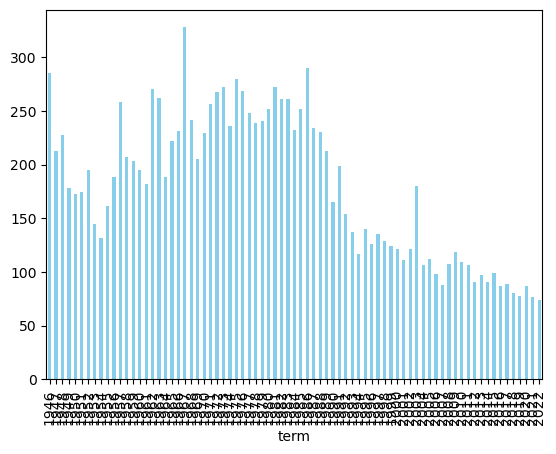

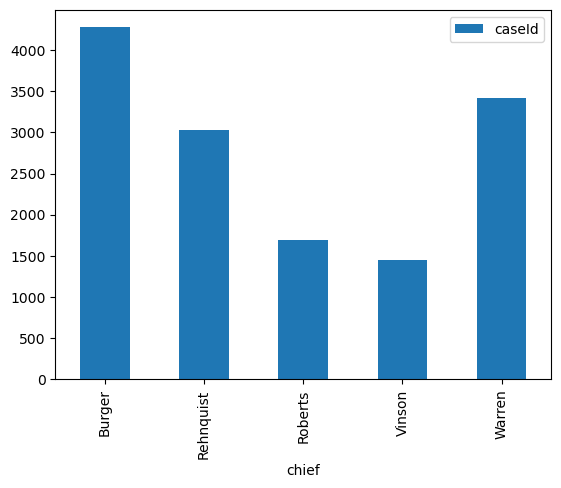

In [4]:
# added by dipesh
path = "https://docs.google.com/spreadsheets/d/1_ODNIn5n1k9RSVr_7gV2On4idZ6v0B2XPeMhCD18kio/pub?gid=1188863554&single=true&output=csv"
df = pd.read_csv(path)
df1 = pd.DataFrame(df)
df1.head()
df1 = df1.set_index('voteId')
df1['term'].value_counts().sort_index().plot(kind='bar', color='skyblue')
df2 = df1[['chief','caseId']]
df2 = df2.sort_values(by='caseId',ascending=True)

df2['chief'].value_counts()
df2.pivot_table(index='chief',values='caseId',aggfunc='count').plot(kind='bar')